In [1]:
import numpy as np, plottools as pl, healpy as hp, local, binning as bn, tools_qrec, curvedsky as cs, pickle, tools_cib, warnings
from matplotlib.pyplot import *
warnings.filterwarnings("ignore")

In [7]:
def compute_clkI(wind,klm,lmax,wlen):
    iobj = tools_cib.init_cib(dtype='gnilc',wind=wind)
    Ilm  = pickle.load(open(iobj.falm[0],"rb"))
    wcib = hp.read_map(iobj.famask)
    wfac = np.mean(wcib*wlen**2)
    print(wfac)
    return cs.utils.alm2cl(lmax,klm,Ilm)/wfac * 1e6*2.726*0.0059757149*9113.0590 #Jy/str

In [3]:
aobj = local.init_analysis()

In [4]:
klm = cs.utils.lm_healpy2healpix( hp.read_alm(aobj.flens['MV'][0]), 4096 )[:aobj.lmax+1,:aobj.lmax+1]
wlen = hp.read_map(aobj.flens['mask'])

In [11]:
mb = bn.multipole_binning(30,lmin=1,lmax=2048)

0.38366162241820745
0.5699631555419208


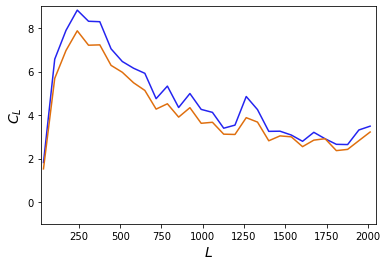

In [12]:
pl.plot_1dstyle(ymin=-1,ymax=9)
for wind in ['G40','G60']:
    clIk = compute_clkI(wind,klm,aobj.lmax,wlen)
    cbIk = bn.binning(clIk*aobj.l,mb)
    plot(mb.bc,cbIk)